##### Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall.
Классификация пойдет по наличию или отсутствию медали.


In [ ]:
# подготовка данных
import pandas as pd

In [ ]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [ ]:
print('Для height пустых строк ' + str( len( df[ pd.isnull( df['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( df[ pd.isnull( df['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( df[ pd.isnull( df['sport'] ) ] ) ))
print('Для dob пустых строк ' + str( len( df[ pd.isnull( df['dob'] ) ] ) ))


Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Для dob пустых строк 1


In [ ]:
df[['height', 'weight']] = df[['height', 'weight']]. fillna(df[['height', 'weight']].mean()) # замена на среднее
df = df.dropna(how='any',axis=0) # удаление величины null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11537 non-null  float64
 6   weight       11537 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [ ]:
df= df[['sex', 'dob', 'height', 'weight',
       'gold', 'silver', 'bronze']]

In [ ]:
df.dob.max()

'9/9/98'

In [ ]:
GENDER_ENCODING = {'male': 0, 'female': 1}
df['sex'] = df['sex'].map(GENDER_ENCODING)
df.head(3)

<ipython-input-48-fdd789ad8b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map(GENDER_ENCODING)


,sex,dob,height,weight,gold,silver,bronze
0,0,10/17/69,1.72,64.0,0,0,0
1,1,9/23/86,1.68,56.0,0,0,0
2,0,5/27/92,1.98,79.0,0,0,1


In [ ]:
# необходимо посчитать возраст в годах. Отсчет пойдет от января 2024
data = pd.DataFrame()
data[['day', 'month', 'year']] = df['dob'].str.split('/', expand=True)
data['age'] = round((122*12  - pd.to_numeric(data['year'])*12 -  pd.to_numeric(data['month']))/12,1) #122 - это 2022 год
data.head(3)

,day,month,year,age
0,10,17,69,51.6
1,9,23,86,34.1
2,5,27,92,27.8


In [ ]:
df['age'] = data['age']
df.head(3)
df['medal'] =df.gold + df.silver +df.bronze #целевая переменная будет вналичие хотя бы одной  медали.
df.loc[df['medal'] > 1, 'medal'] = 1

In [ ]:
df = df.drop(columns=['dob', 'gold', 'silver', 'bronze'])
df.head()

,sex,height,weight,age,medal
0,0,1.72,64.0,51.6,0
1,1,1.68,56.0,34.1,0
2,0,1.98,79.0,27.8,1
3,0,1.83,80.0,30.8,0
4,0,1.81,71.0,29.8,0


In [ ]:
df

,sex,height,weight,age,medal
0,0,1.72,64.0,51.6,0
1,1,1.68,56.0,34.1,0
2,0,1.98,79.0,27.8,1
3,0,1.83,80.0,30.8,0
4,0,1.81,71.0,29.8,0
...,...,...,...,...,...
11533,1,1.64,58.0,26.2,0
11534,1,1.73,63.0,34.4,0
11535,0,1.85,100.0,29.8,0
11536,0,1.60,56.0,32.6,0


In [ ]:
df.columns

Index(['sex', 'height', 'weight', 'age', 'medal'], dtype='object')

In [ ]:
X = df [['sex', 'height', 'weight', 'age']]
y = df['medal']

In [ ]:
# Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.8393108679163507

In [ ]:
model.score(X_test,y_test) # модель работает.

0.8379549393414212

In [ ]:
 # Построим ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
predictions = model.predict_proba(X_test)

In [ ]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


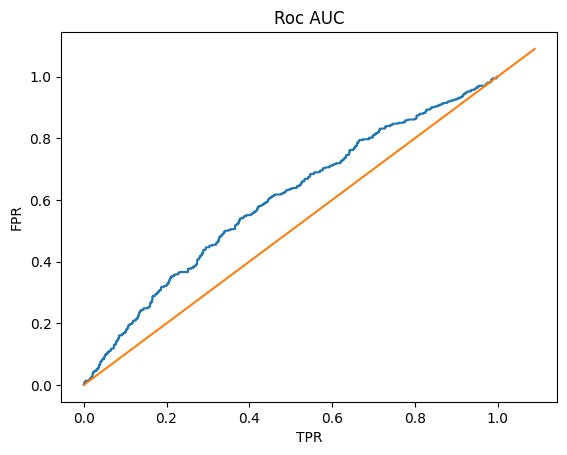

In [ ]:

plt.ylabel('FPR') #ложно положительные
plt.xlabel('TPR') # положительно предсказнные положительные ответы
plt.title ('Roc AUC')
plt.plot( fpr, tpr )
plt.plot(np.arange(0,01.1,0.01), np.arange(0,01.1,0.01)) #прямая
plt.show()

Расчитаем ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

по вертикальной оси у нас истинно положительные значения, по горизонтальной - ложно положительные.
Это значит чем более выгнутой в левый верхний угол вышибается кривая,
тем более точная модель получается. Кривая не может находиться в правой нижней части координат. Выходит из формулы:
FPR = FP/(FP+TN)
1) FP = 0 -> FPR= 0
2) FP = 1 && TN =1 -> FPR = 0.5
3) FP = 1 && TN =0 -> FPR = 1

TPR = FP/(FP+TN)
TP = 0 -> TPR= 0 ->
TP =1 && TN =1 ->TPR =0.5
TP =1 && TN =0 ->TPR =1



In [ ]:
#  по вертикальной оси у нас Истинно положительные значения, по горизонтальной - ложно положительные.
#  Это значит чем более выгнутой в левый верхний угол вышибается кривая,
#тем более точная модель получается.
from sklearn import metrics
y_pred = model.predict_proba (X_test)[::,1]
auc = metrics.roc_auc_score (y_test, y_pred)
auc # Хороший auc в районе единицы получается. в данном случае он равер 0.6, что является слабой точностью

0.5963126766171355

Реализация подсчета метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [ ]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [ ]:
# Точнгость в ручную
(tp + tn) / (tp + fp + fn + tn)

0.8379549393414212

In [ ]:
# проверка
model.score(X_test,y_test)

0.8379549393414212

Построим ROC-кривую с помощью вычисленных метрик. Затем сравнить результаты полученные в ручную и через SKlearn

In [ ]:
# Для этого нужно проранжировать предыдущий код по порогу
def get_res (prob):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= prob:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return {'tp':tp, 'fp':fp, 'fn':fn, 'tn':tn}

In [ ]:
get_res (0.5)

{'tp': 0, 'fp': 0, 'fn': 374, 'tn': 1934}

In [ ]:
import numpy as np
FPR_hand =[]
TPR_hand =[]
# изменение порогового значения от 0.01 до 1
for i in np.arange(0,01.1,0.01):
    data = get_res (i)
    FPR_hand.append(data['fp']/(data['fp']+data['tn']))
    TPR_hand.append(data['tp']/(data['tp']+data['fn']))


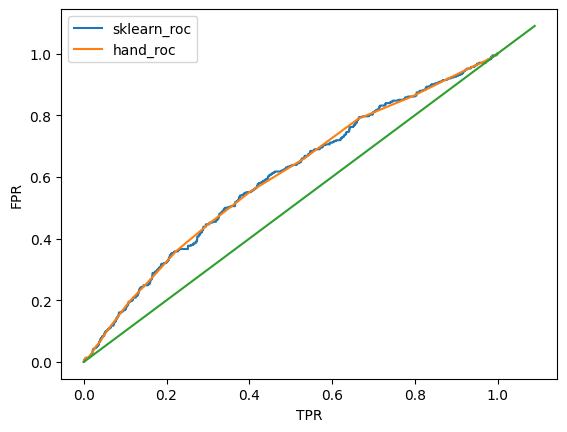

In [ ]:
plt.plot( fpr, tpr, label = 'sklearn_roc' )
plt.plot(FPR_hand, TPR_hand, label = 'hand_roc' )
plt.legend()
plt.ylabel('FPR') #ложно положительные
plt.xlabel('TPR') # положительно предсказнные положительные ответы
plt.plot(np.arange(0,01.1,0.01), np.arange(0,01.1,0.01))

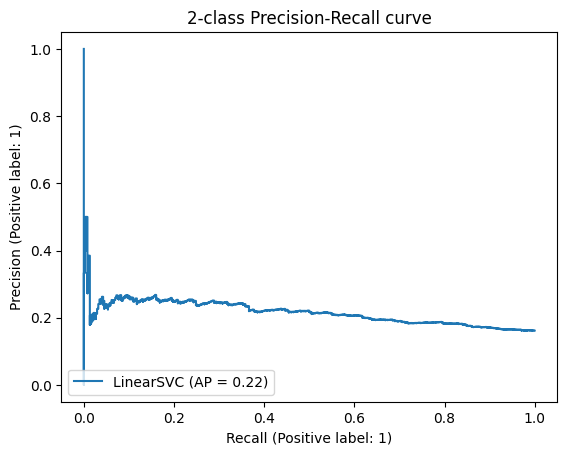

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

 Площадь под кривой мала, что свидетельствует так же о не высоком качестве модели.